In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# warning off
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
boston_data = load_boston()
print(boston_data.keys())
x_data = boston_data.data
y_data = boston_data.target

print(x_data.shape, y_data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13) (506,)


In [21]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* CRIM : 지역별 범죄 발생율
* ZN L 25,000 평방피트를 초과하는 거주지역의 비율
* INDUS : 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미변수(강의 경계이면 1, 아니면 0)
* NOX ; 일산화질소 농도
* RM : 거주할 수 있는 방개수
* AGE : 1940년 이전에 건축된 소유주택의 비율
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000 달러당 재산세율
* PRATIO : 지역의 교사와 학생수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율
* MEDV : 본인 소유의 주택 가격(중앙값)

In [22]:
boston_df = pd.DataFrame(x_data, columns=boston_data.feature_names)
boston_df['price'] = y_data

print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

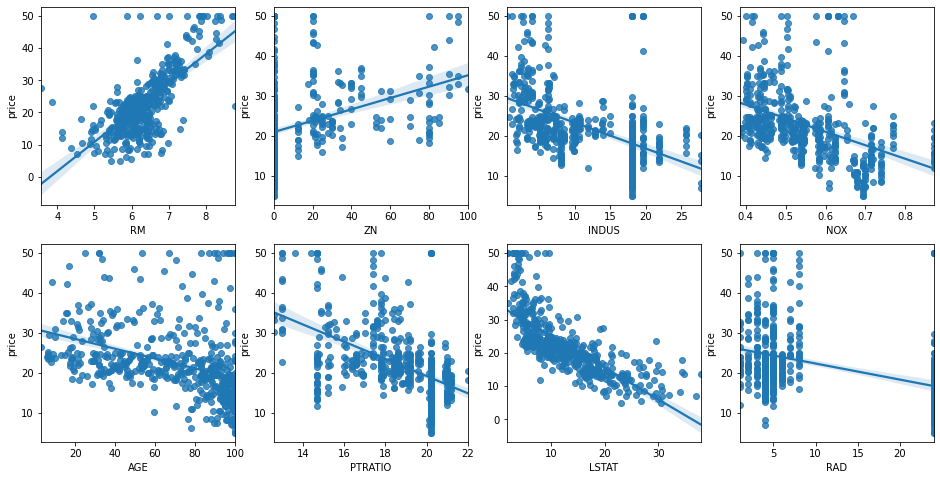

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

figure, axes = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='price', data=boston_df, ax=axes[row][col])

### K-NN 알고리즘 사용
* KNeighborsRegressor 사용
* 최적의 parameter를 찾기 위해서 GridSearchCV 사용

In [32]:
# 학습데이터와 검증데이터 준비
# drop() 함수의 axes=1은 컬럼을 나타낸다.
X_data = boston_df.drop(['price'], axis=1, inplace=False)
print(X_data.columns)
y_target = boston_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', weights='uniform')

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('r2_score 예측 정확도 점수 {:.2f}'.format(r2_score(y_test, y_predict)))
print('score 예측 정확도 점수 {:.2f}'.format(model.score(X_test, y_test)))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
(354, 13) (354,)
(152, 13) (152,)
r2_score 예측 정확도 점수 0.52
score 예측 정확도 점수 0.52


In [33]:
param_dict = {
    'n_neighbors':[5,1,2,3,4],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski','seuclidean']
}

model = KNeighborsRegressor()
grid = GridSearchCV(model, param_grid=param_dict)
grid.fit(X_train, y_train)

grid_df = pd.DataFrame(grid.cv_results_).sort_values(by='param_n_neighbors')
#grid_df.head()
print('Best Parameter ', grid.best_params_)
print('Best Score ', grid.best_score_)

estimator = grid.best_estimator_
print(type(estimator))

estimator.fit(X_train, y_train)

y_predict = estimator.predict(X_test)
print('r2_score 예측 정확도 점수 {:.4f}'.format(r2_score(y_test, y_predict)))

Best Parameter  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score  0.6149289420113496
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
r2_score 예측 정확도 점수 0.6560


### 일반 선형 회귀 알고리즘 사용
* 평균제곱 값 MES(Mean Squared Error) : 실제값과 예측값의 차이를 제곱해서 평균한 값
* RMSET(Root Mean Sqaured Errro) : MSE 값은 오류의 제곱을 구하므로, 실제 오류 평균보다 더 커질 수 있기 때문에 MSE에 root를 씌운 값

In [34]:
X_data = boston_df.drop(['price'], axis=1, inplace=False)
print(X_data.columns)
y_target = boston_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

score = r2_score(y_test, y_predict)
print('Score {:.4f}'.format(score))
mse = mean_squared_error(y_test, y_predict)
print('MSE {:.4f}'.format(mse))
rmse = np.sqrt(mse)
print('RMSET {:.4f}'.format(rmse))

print('회귀계수 {}'.format( np.round(model.coef_,1)) )
print('절편 값 {}'.format(model.intercept_))

# 독립변수 중에서 어떤 feature가 가격을 결정할때 영향을 주었는지 살펴보기
# 회귀계수를 큰값 순으로 정렬하기 위해 Series 생성하기
coeff = pd.Series(data=np.round(model.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Score 0.7572
MSE 17.2969
RMSET 4.1590
회귀계수 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편 값 40.9955951721646


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

NameError: name 'feature_names' is not defined